#  "Explorando el corazón: Utilizando datos clínicos y de estilo de vida para predecir enfermedades cardíacas"

### INTRODUCCIÓN

 Este proyecto se centra en la detección temprana y prevención de enfermedades cardíacas, que son una de las principales causas de muerte en los Estados Unidos. A través del análisis de factores de riesgo clave como presión arterial alta, colesterol elevado, tabaquismo, estado diabético, obesidad y falta de actividad física, se busca desarrollar un modelo de aprendizaje automático capaz de predecir la condición cardíaca de los individuos. Al aplicar técnicas computacionales avanzadas, se pretende identificar patrones y tendencias en los datos clínicos, lo que permitirá una detección temprana y un enfoque preventivo para mejorar la salud cardiovascular. Este proyecto busca brindar una herramienta eficiente para los profesionales de la salud en la toma de decisiones y promover una atención personalizada y preventiva para reducir la carga de las enfermedades cardíacas en la población.

### CARACTERÍSTICAS 

A continuación, se muestra una breve descripción con el significado de cada variable para una mejor comprensión acerca del problema a tratar.

<details>
<summary>Características del problema a tratar</summary>
<p>

**HeartDisease**: Encuestados que alguna vez informaron haber tenido una enfermedad cardíaca coronaria (CHD) o un infarto de miocardio (IM).

**IMC**: Índice de Masa Corporal (IMC).

**Smoking**: ¿Ha fumado al menos 100 cigarrillos en toda su vida? (La respuesta Sí o No).

**AlcoholDrinking**: Bebedores frecuentes (hombres adultos que toman más de 14 tragos p/semana y mujeres adultas que toman más de 7 tragos p/semana)

**Stroke**: ¿Alguna vez le dijeron usted tuvo un accidente cerebrovascular?

**PhysicalHealth**: Su salud física, incluye enfermedades y lesiones físicas, ¿cuántos días durante los últimos 30 días su salud física no fue buena?

**MentalHealth**: Pensando en su salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días).

**DiffWalking**: ¿Tiene serias dificultades para caminar o subir escaleras?

**Sex**: ¿Hombre o Mujer?

**AgeCategory**: Categoría de edad de catorce niveles.

**Race**: Valor de raza/etnicidad imputado.

**Diabetic**: ¿Alguna vez le dijeron usted tenía diabetes?

**PhysicalActivity**: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual.

**GenHealth**: ¿Diría usted que, en general, su salud es...?

**SleepTime**: En promedio, ¿cuántas horas duermes en un período de 24 horas?

**Asthma**: ¿Alguna vez le dijeronn usted tenía asma?

**KidneyDisease**: sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿alguna vez le dijeron que tenía una enfermedad renal?

**SkinCancer**: (Alguna vez le dijeron) (usted tenía) cáncer de piel?

</p>
</details>

#### OBJETIVO PRINCIPAL A TRATAR

El objetivo principal en este caso es **predecir la presencia o ausencia de enfermedad cardíaca (HeartDisease)**. Por lo tanto, la columna "HeartDisease" será tu variable objetivo o target en el problema de machine learning. Será la variable que se tratará de  predecir utilizando las demás características presentes en el dataframe.

### ANÁLISIS EXPLORATORIO DE DATOS (EDA)




In [1]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas
import os

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Leemos el archivo de data/preprocessed_heart
df= pd.read_csv("../data/processed/processed_heart.csv")
df.head()


,HeartDisease,Smoking,Stroke,DiffWalking,Sex,AgeCategory_encoded,Diabetic_encoded,BMI_Category_Ordinal,GrupoSalud_Ordinal,GrupoSalud_Mental_Ordinal,SleepGroup_Ordinal
0,0,1,0,0,0,7,2,1,1,3,1
1,0,0,1,0,0,12,0,2,1,1,3
2,0,1,0,0,1,9,2,3,3,3,3
3,0,0,0,0,0,11,0,2,1,1,2
4,0,0,0,1,0,4,0,2,3,1,3


In [43]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Todos los valores son numéricos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   HeartDisease         319795 non-null  int64
 1   Smoking              319795 non-null  int64
 2   Stroke               319795 non-null  int64
 3   DiffWalking          319795 non-null  int64
 4   Sex                  319795 non-null  int64
 5   AgeCategory_encoded  319795 non-null  int64
 6   Diabetic_encoded     319795 non-null  int64
 7   GrupoSalud_Ordinal   319795 non-null  int64
dtypes: int64(8)
memory usage: 19.5 MB


In [44]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

HeartDisease           0
Smoking                0
Stroke                 0
DiffWalking            0
Sex                    0
AgeCategory_encoded    0
Diabetic_encoded       0
GrupoSalud_Ordinal     0
dtype: int64

In [45]:
# Incluimos todos los parámetros para hacernos una idea más general
df.describe(include="all")

,HeartDisease,Smoking,Stroke,DiffWalking,Sex,AgeCategory_encoded,Diabetic_encoded,GrupoSalud_Ordinal
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.037740,0.138870,0.475273,6.514536,0.300386,1.252524
std,0.279766,0.492281,0.190567,0.345812,0.499389,3.564759,0.716480,0.592778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,3.000000,3.000000


In [46]:
# Para ver el contenido de valores únicos de cada variable
for column in df.columns :
    unique_values = df[column].unique()
    print(column, unique_values)

HeartDisease [0 1]
Smoking [1 0]
Stroke [0 1]
DiffWalking [0 1]
Sex [0 1]
AgeCategory_encoded [ 7 12  9 11  4 10  8  6  5  0  3  2  1]
Diabetic_encoded [2 0 1 3]
GrupoSalud_Ordinal [1 3 2]


### VISUALIZACIONES

<details>
<summary>¿El por qué de las visualizaciones?</summary>
<p>

Las visualizaciones desempeñan un papel fundamental en la comprensión de la problemática que estamos abordando. Nos permiten analizar de manera más efectiva cómo se distribuyen nuestras variables, en qué cantidad se presentan y realizar comparaciones significativas entre ellas. La forma en que representamos gráficamente los datos influye en nuestra percepción y comprensión del problema de manera considerable. Las visualizaciones nos ayudan a ver patrones, identificar tendencias y descubrir relaciones entre las variables de una manera más clara y concisa.

Con las siguientes visualizaciones, podremos mejorar aún más nuestra comprensión del problema. Estas representaciones gráficas nos permitirán analizar de manera más detallada las características de nuestras variables y su relación con la variable objetivo. Al utilizar visualizaciones efectivas, podremos obtener una visión más completa y precisa de la problemática que estamos abordando, lo cual nos facilitará la toma de decisiones informadas y nos ayudará a identificar posibles soluciones o enfoques para resolver el problema en cuestión.
</p>
</details>

#### VARIABLES BINARIAS

<details>
<summary>¿Cómo se van a visualizar las variables binarias?</summary>
<p>
En esta sección, nos enfocaremos en realizar una visualización detallada de las variables binarias para obtener una representación visual más clara de cómo se distribuyen. Esto nos permitirá identificar si hay una predominancia de valores 0 o 1 en cada variable. Es importante recordar que el valor 0 generalmente se interpreta como "No" o "Falso", mientras que el valor 1 se interpreta como "Sí" o "Verdadero". Al visualizar estas variables binarias, podremos obtener una idea más clara de la proporción de respuestas afirmativas o negativas en nuestro conjunto de datos.
</p>
</details>

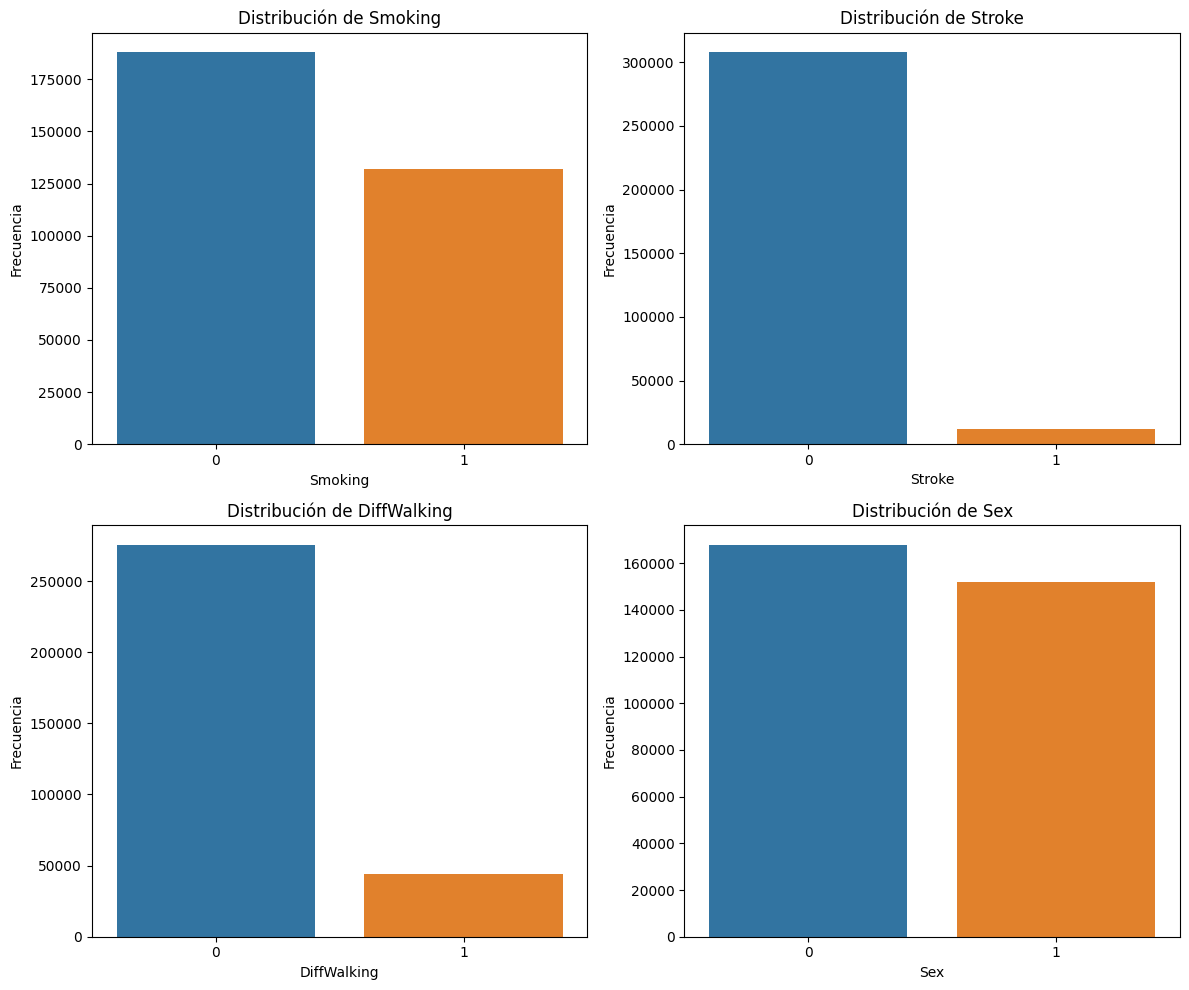

In [47]:
# Lista de variables binarias
binary_columns = ["Smoking", "Stroke", "DiffWalking", "Sex"]

# Configuración de los subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4) # La distancia entre ambas barras

# Gráfico de barras para la primera variable binaria
sns.countplot(x=binary_columns[0], data=df, ax=axes[0, 0])
axes[0, 0].set_title(f'Distribución de {binary_columns[0]}')
axes[0, 0].set_xlabel(binary_columns[0])
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de barras para la segunda variable binaria
sns.countplot(x=binary_columns[1], data=df, ax=axes[0, 1])
axes[0, 1].set_title(f'Distribución de {binary_columns[1]}')
axes[0, 1].set_xlabel(binary_columns[1])
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico de barras para la tercera variable binaria
sns.countplot(x=binary_columns[2], data=df, ax=axes[1, 0])
axes[1, 0].set_title(f'Distribución de {binary_columns[2]}')
axes[1, 0].set_xlabel(binary_columns[2])
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico de barras para la cuarta variable binaria
sns.countplot(x=binary_columns[3], data=df, ax=axes[1, 1])
axes[1, 1].set_title(f'Distribución de {binary_columns[3]}')
axes[1, 1].set_xlabel(binary_columns[3])
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [50]:
current_dir = os.getcwd() # ruta del diractorio actual
output_file = os.path.join(current_dir, '..', 'docs', 'imagenes', 'binary_variables.png') # ruta de la imagen guardada

fig.savefig(output_file) # guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\CURSO DATA SCIENCE BOOTCAMP\PROYECTO-MACHINE-LEARNING\notebooks\..\docs\imagenes\binary_variables.png


<details>
<summary>Análisis de los gráficos de variables binarias</summary>
<p>
Al analizar los gráficos de barras, se observa que las variables "DiffWalking" y "Stroke" presentan un desequilibrio en la distribución de clases. Este desequilibrio se refiere a una disparidad notable en la cantidad de instancias entre las diferentes clases o categorías de esas variables.

Este desequilibrio puede tener un impacto negativo en el rendimiento del modelo de aprendizaje automático, ya que puede sesgar la capacidad de aprendizaje y generar resultados sesgados hacia la clase mayoritaria. Por lo tanto, es importante abordar y gestionar este desequilibrio de manera efectiva para mejorar el modelo.

Al abordar el desafío del desequilibrio en la distribución de clases, mejoraremos la calidad y confiabilidad de nuestro modelo de aprendizaje automático, lo que nos permitirá obtener resultados más precisos y generalizables.

</p>
</details>

#### VISUALIZACIÓN DE LA VARIABLE TARGET 

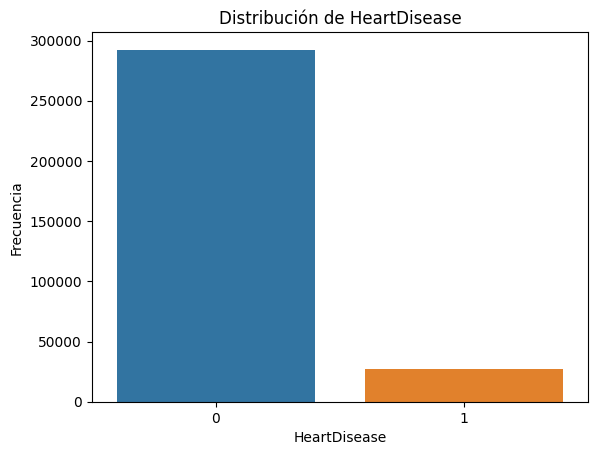

In [16]:
sns.countplot(x="HeartDisease", data=df)
plt.title('Distribución de HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Frecuencia')
plt.show()


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\CURSO DATA SCIENCE BOOTCAMP\PROYECTO-MACHINE-LEARNING\notebooks\..\docs\imagenes\pie_plot2.png


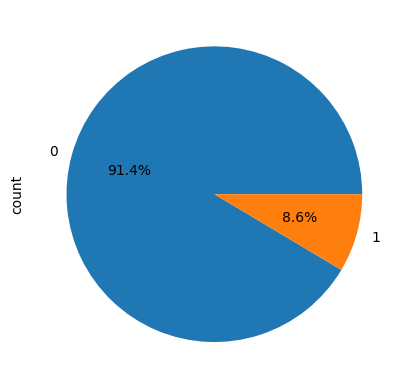

In [60]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, '..', 'docs', 'imagenes', 'pie_plot.png')

# Aquí podemos apreciar mejor el desbalanceo de la variable target "HeartDisease"
fig2 = df['HeartDisease'].value_counts().plot.pie(autopct="%.1f%%")

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")


<details>
<summary>Explicación detallada de la variable target</summary>
<p>
Al analizar el gráfico de barras y el gráfico de pastel de la variable target "HeartDisease", se puede observar un alto desbalanceo en la distribución de clases. El desbalanceo se refiere a una disparidad significativa en la cantidad de instancias entre las clases de la variable.

En este caso, aproximadamente el 91% de las instancias de la variable "HeartDisease" pertenecen a la clase 0, que representa la categoría "No". Esto indica que la gran mayoría de los registros en el conjunto de datos no presentan enfermedades cardíacas.

Por otro lado, el porcentaje restante, que no alcanza ni el 9%, corresponde a la clase 1, que representa la categoría "Sí". Estos registros representan los casos en los que se observa la presencia de enfermedades cardíacas.

Este desequilibrio en la distribución de clases puede tener un impacto significativo en el rendimiento de los modelos de aprendizaje automático. Es importante tener en cuenta esta disparidad, ya que puede resultar en un sesgo hacia la clase mayoritaria durante el entrenamiento y la evaluación del modelo.

</p>
</details>

#### VARIABLES CATEGÓRICAS

##### Índice de masa corporal (BMI)
<details>
<summary>¿Cómo se van a visualizar las variables categóricas?</summary>
<p>
En esta sección, nos enfocaremos en realizar visualizaciones que nos permitan analizar cómo las variables categóricas transformadas por grupos se relacionan con nuestra variable objetivo, "HeartDisease". Mediante estas representaciones visuales, podremos obtener una percepción detallada de cómo estas variables categóricas influyen en la variable objetivo y cómo se distribuyen en relación a ella. Esto nos proporcionará una comprensión más profunda de la influencia de las variables categóricas en la presencia de enfermedades cardíacas y nos ayudará a identificar posibles patrones o tendencias. Al visualizar estas relaciones, podremos obtener información valiosa que nos permitirá realizar análisis más precisos y tomar decisiones informadas en relación a nuestro objetivo de estudio.

</p>
</details>

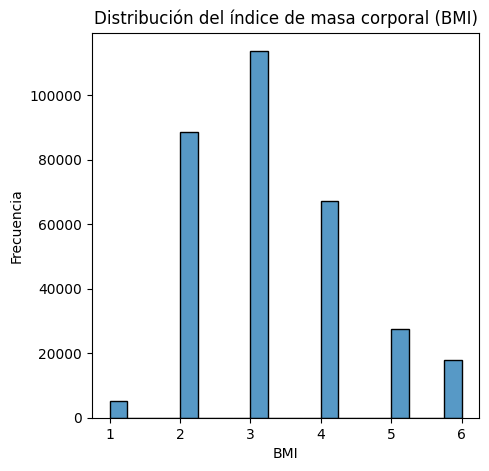

In [36]:
# Visualización de datos
# histograma del índice de masa corporal (BMI) en la variable de "BMI_Category_Ordinal"
plt.figure(figsize=(5, 5))
sns.histplot(df['BMI_Category_Ordinal'], bins=20)
plt.title('Distribución del índice de masa corporal (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

<details>
<summary>Análisis de la distribución del índice de masa corporal (BMI)</summary>
<p>
Al analizar el gráfico de barras, se puede observar claramente que existe una distribución desigual en las categorías de peso. La mayoría de las personas en el conjunto de datos se encuentran en la categoría de "sobrepeso" (número 3), seguida por la categoría de "peso normal" (número 2) y la categoría de "obesidad clase I" (número 4). Estos hallazgos revelan un alto porcentaje de personas que no se encuentran dentro de un rango de peso considerado saludable.

</p>
</details>

##### Índice de masa corporal (BMI) VS "HeartDisease"
Antes de mostrar el siguiente gráfico recuerda que transformamos la columna de "BMI" por "BMI_Category_Ordinal" de la siguiente manera:

<details>
<summary>Distribución de los grupos del índice de masa corporal  </summary>
<p>

1. Para los valores que estuvieran en dicho rango se agrapaban dentro de cada uno de estos grupos:

        'Bajo peso': (0, 18.4)

        'Peso normal': (18.5, 24.9)

        'Sobrepeso': (25, 29.9)

        'Obesidad clase I': (30, 34.9)

        'Obesidad clase II': (35, 39.9)
        
        'Obesidad clase III (obesidad mórbida)': (más de 40)

2. Para los grupos definidos anteriormente se le asignaban una serie de valores:

        'Bajo peso': 1

        'Peso normal': 2

        'Sobrepeso': 3

        'Obesidad clase I': 4

        'Obesidad clase II': 5

        'Obesidad clase III (obesidad mórbida)': 6
</p>
</details>

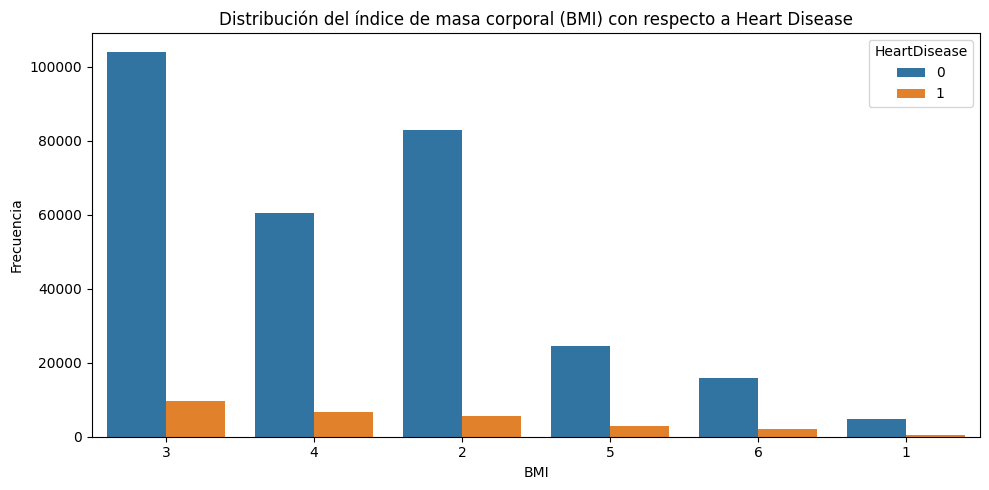

In [37]:
plt.figure(figsize=(10, 5))

# Ordenar por "HeartDisease" cuando sea 1
order = df[df['HeartDisease'] == 1]['BMI_Category_Ordinal'].value_counts().index

# Gráfico de barras agrupadas
sns.countplot(data=df, x='BMI_Category_Ordinal', hue='HeartDisease', linewidth=0.5,
              order=order) # lo establecemos por orden de los valores de 1 de la variable de "HeartDisease"

plt.title('Distribución del índice de masa corporal (BMI) con respecto a Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

plt.tight_layout() # para evitar superposición en los gráficos
plt.show()


<details>
<summary>Descripción del gráfico Índice de masa corporal (BMI) VS "HeartDisease</summary>
<p>
En el gráfico comparativo, se muestra la distribución de la variable objetivo "HeartDisease" en relación con la variable "BMI_Category_Ordinal", que representa los grupos de categorías de índice de masa corporal (IMC) ordenados de mayor a menor relevancia. La variable objetivo toma el valor 0 para "no" y el valor 1 para "sí", indicando si una persona ha padecido alguna vez una enfermedad cardíaca.

El gráfico revela una tendencia interesante: a medida que avanzamos en el eje x y nos desplazamos hacia los grupos de IMC de mayor relevancia, la proporción de personas que han padecido una enfermedad cardíaca aumenta. Específicamente, se observa que los grupos de "BMI_Category_Ordinal" que se encuentran en tercer lugar y en cuarto lugar, correspondientes al sobrepeso (grupo 3) y a la obesidad de clase I (grupo 4), respectivamente, tienen una mayor proporción de personas que han padecido enfermedades cardíacas.

Estos hallazgos sugieren que las personas con sobrepeso y aquellas con obesidad de clase I tienen una mayor probabilidad de haber experimentado problemas cardíacos en comparación con los grupos de IMC más bajos. En otras palabras, el riesgo de enfermedad cardíaca parece ser más prominente en personas con un IMC más alto.

Estos insights podrían ser útiles para comprender mejor la relación entre el índice de masa corporal y las enfermedades cardíacas, y podrían servir de base para futuras investigaciones o intervenciones dirigidas a aquellos grupos con mayor riesgo de enfermedades cardíacas, como aquellos que se encuentran en sobrepeso y obesidad de clase I.
</p>
</details>

### Visualización de la distribución de la Salud Física por grupos 


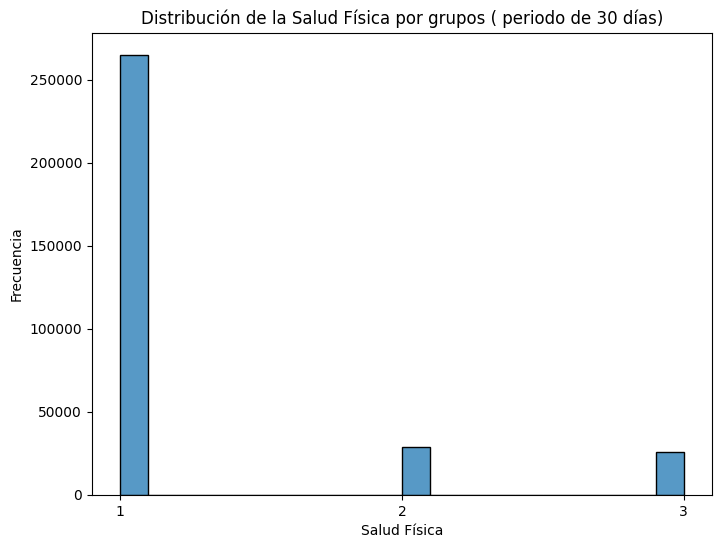

In [38]:
# Visualización de datos de la variable "GrupoSalud_Ordinal" 
plt.figure(figsize=(8, 6))
sns.histplot(df['GrupoSalud_Ordinal'], bins=20)
plt.title('Distribución de la Salud Física por grupos ( periodo de 30 días)')
plt.xlabel('Salud Física')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()


<details>
<summary>Descripción detallada del gráfico</summary>
<p>
La distribución de la salud física por grupos (periodo de 30 días) revela que la mayoría de las personas se encuentran en el grupo de "Buena salud" (número 1). Por otro lado, se observa una disminución significativa en el número de personas que pertenecen a los grupos de "Salud moderada" y "Mala salud". Estos dos últimos grupos presentan valores muy similares entre sí. Esta distribución desbalanceada plantea un desafío a la hora de abordar estas variables y mejorar nuestro modelo. Es importante considerar estrategias para equilibrar los datos y garantizar una representación más precisa de todas las categorías de salud física en nuestro análisis.

</p>
</details>

##### GrupoSalud_Ordinal VS "HeartDisease"

Antes de mostrar el siguiente gráfico recuerda que transformamos la columna de "PhysicalHealth" por "GrupoSalud_Ordinal" de la siguiente manera:
<details>
<summary>Distribución de los grupos de "GrupoSalud_Ordinal"</summary>
<p>
1. Para los valores que estuvieran dentro de cada uno de estos grupos:

    umbral_buena_salud = - 5
    
    umbral_moderada_salud = (5,15)

    Mala Salud = + 15

2. Para los grupos definidos anteriormente se le asignan una serie de valores:

    Buena salud = 1

    Salud moderada = 2

    Mala salud = 3
</p>


</p>
</details>

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\CURSO DATA SCIENCE BOOTCAMP\PROYECTO-MACHINE-LEARNING\notebooks\..\docs\imagenes\bar_plot.png


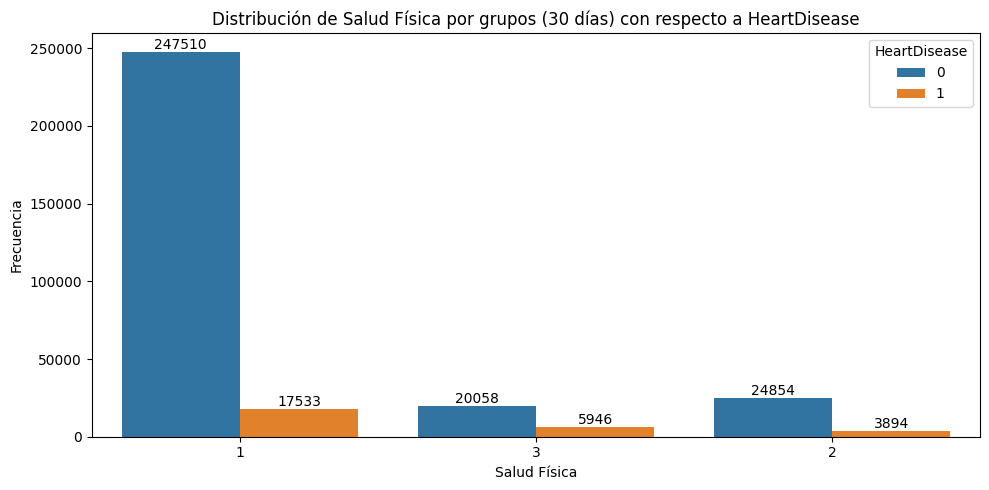

In [61]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, '..', 'docs', 'imagenes', 'bar_plot.png')

plt.figure(figsize=(10, 5))

# Ordenado HeartDisease" cuando sea 1
order = df[df['HeartDisease'] == 1]['GrupoSalud_Ordinal'].value_counts().index

# Gráfico de barras agrupadas
ax = sns.countplot(data=df, x='GrupoSalud_Ordinal', hue='HeartDisease', linewidth=0.5, order=order)

plt.title('Distribución de Salud Física por grupos (30 días) con respecto a HeartDisease')
plt.xlabel('Salud Física')
plt.ylabel('Frecuencia')

# Mostrar la cantidad en cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.tight_layout()
plt.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")



<details>
<summary>Descripción detallada del gráfico GrupoSalud_Ordinal VS "HeartDisease"</summary>
<p>
En el gráfico comparativo, se muestra la distribución de la variable objetivo "HeartDisease" en relación con la variable "GrupoSalud_Ordinal", la cual representa los grupos de salud ordenados de mayor a menor relevancia. La variable objetivo toma el valor 0 para "no" y el valor 1 para "sí", indicando si una persona ha padecido alguna vez una enfermedad cardíaca.

El gráfico revela una tendencia interesante: a medida que avanzamos en el eje x y nos desplazamos hacia los grupos de salud de mayor relevancia, la proporción de personas que han padecido una enfermedad cardíaca aumenta. Específicamente, se observa que los grupos de "GrupoSalud_Ordinal" que se encuentran en primer lugar y en segundo lugar, correspondientes a aquellos con buena salud (grupo 1) y mala salud (grupo 2), respectivamente, tienen una mayor proporción de personas que han padecido enfermedades cardíacas.

Estos hallazgos sugieren que las personas con mejor salud y aquellas con peor salud tienen una mayor probabilidad de haber experimentado problemas cardíacos en comparación con los grupos intermedios de salud. En otras palabras, el riesgo de enfermedad cardíaca parece ser más prominente en los extremos del espectro de salud.

Estos insights podrían ser útiles para comprender mejor la relación entre la salud y las enfermedades cardíacas, y podrían servir de base para futuras investigaciones o intervenciones dirigidas a aquellos grupos con mayor riesgo de enfermedades cardíacas.

</p>
</details>

### Visualización de la distribución de la Salud Mental por grupos 

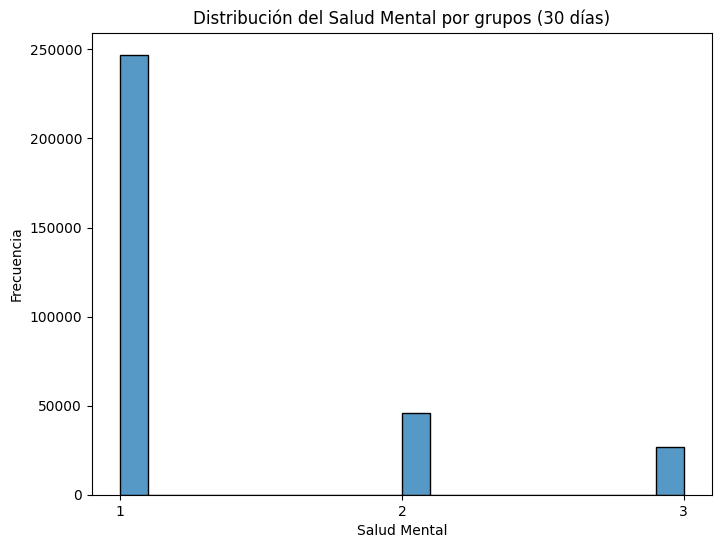

In [40]:
# Visualización de datos de la variable "GrupoSalud_Mental_Ordinal"
plt.figure(figsize=(8, 6))
sns.histplot(df['GrupoSalud_Mental_Ordinal'], bins= 20)
plt.title('Distribución del Salud Mental por grupos (30 días)')
plt.xlabel('Salud Mental')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()

<details>
<summary>Descripción detallada del gráfico"</summary>
<p>
La distribución de la salud psíquica por grupos (30 días) revela que la mayoría de las personas se encuentran en el grupo de "Buena salud" (número 1). En segundo lugar, se observa un número considerablemente menor de personas en el grupo de "Salud moderada" (número 2), aunque con una diferencia significativa respecto al grupo de "Buena salud". Por último, el grupo de "Mala salud" (número 3) presenta valores aún más bajos en comparación con los grupos anteriores, aunque la diferencia no es tan marcada como en el caso del grupo de "Salud moderada". Esta distribución desequilibrada destaca la necesidad de abordar adecuadamente el desbalance en los datos para mejorar la representación de todos los grupos de salud psíquica en nuestro análisis.

</p>
</details>

##### GrupoSalud_Mental_Ordinal VS "HeartDisease"

Antes de mostrar el siguiente gráfico recuerda que transformamos la columna de "MentalHealth" por "GrupoSalud_Mental_Ordinal" de la siguiente manera:
<details>
<summary>Distribución de los grupos de "GrupoSalud_Ordinal"</summary>
<p>
1. Para los valores que estuvieran dentro de cada uno de estos grupos:

    umbral_buena_salud = - 5
    
    umbral_moderada_salud = (5,15)

    Mala Salud = + 15

2. Para los grupos definidos anteriormente se le asignan una serie de valores:

    Buena salud = 1

    Salud moderada = 2

    Mala salud = 3
</p>


</p>
</details>

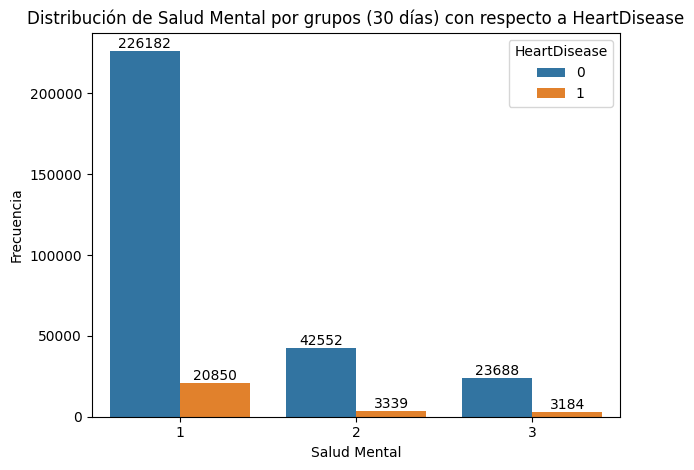

In [41]:

# Ordenar por "HeartDisease" cuando sea 1
order = df[df['HeartDisease'] == 1]['GrupoSalud_Mental_Ordinal'].value_counts().index

# Gráfico de barras agrupadas
ax = sns.countplot(data=df, x='GrupoSalud_Mental_Ordinal', hue='HeartDisease', linewidth=0.5,
                   order=order)

plt.title('Distribución de Salud Mental por grupos (30 días) con respecto a HeartDisease')
plt.xlabel('Salud Mental')
plt.ylabel('Frecuencia')

# Mostrar la cantidad en cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

<details>
<summary>Descripción detallada del gráfico de "GrupoSalud_Mental_Ordinal" VS "HeartDisease"</summary>
<p>

En el gráfico comparativo, se muestra la distribución de la variable objetivo "HeartDisease" en relación con la variable "GrupoSalud_Mental_Ordinal", que representa los grupos de salud mental ordenados de mayor a menor relevancia. La variable objetivo toma el valor 0 para "no" y el valor 1 para "sí", indicando si una persona ha padecido alguna vez una enfermedad cardíaca.

El gráfico revela una tendencia interesante: a medida que avanzamos en el eje x y nos desplazamos hacia los grupos de salud mental de mayor relevancia, la proporción de personas que han padecido una enfermedad cardíaca parece aumentar inicialmente, pero luego se mantiene constante. Específicamente, se observa que el primer grupo de "GrupoSalud_Mental_Ordinal", correspondiente a aquellos con buena salud mental (grupo 1), muestra una proporción relativamente alta de personas que han padecido enfermedades cardíacas.

Sin embargo, los grupos de salud mental moderada (grupo 2) y mala salud mental (grupo 3) presentan valores muy similares y apenas hay diferencia entre ellos en términos de la proporción de personas que han experimentado enfermedades cardíacas.

Estos hallazgos indican que la relación entre la salud mental y las enfermedades cardíacas puede no ser tan clara o definida en comparación con otros factores de salud. Aunque existe una asociación inicial entre una mejor salud mental y un menor riesgo de enfermedades cardíacas, no se observa una diferencia significativa entre los grupos de salud mental moderada y mala salud mental en relación con la proporción de personas con enfermedades cardíacas.
</p>
</details>

### Visualización de la distribución de "SleepTime" 

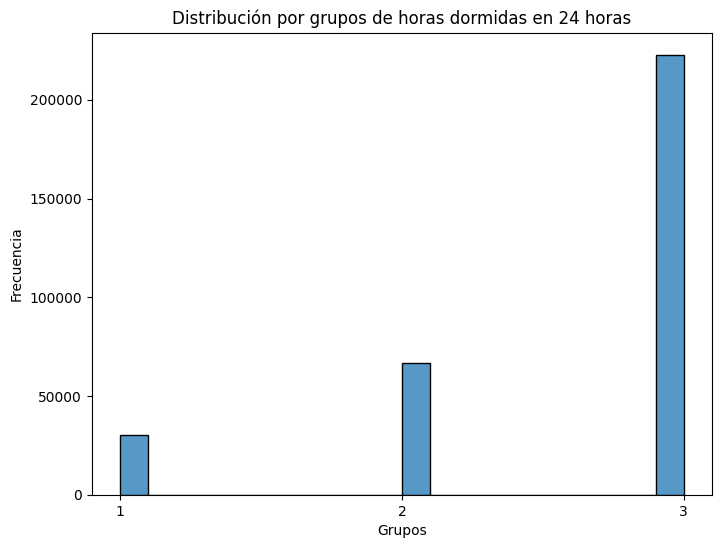

In [42]:
# Visualización de datos de la variable "GrupoSalud_Mental_Ordinal"
plt.figure(figsize=(8, 6))
sns.histplot(df['SleepGroup_Ordinal'], bins= 20)
plt.title('Distribución por grupos de horas dormidas en 24 horas')
plt.xlabel('Grupos')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()


<details>
<summary>Descripción detallada del gráfico"</summary>
<p>
En el gráfico, se representa la relación entre las horas de sueño y los diferentes grupos identificados. Los grupos se clasifican como grupo 1 (Insuficiente), grupo 2 (Óptimo) y grupo 3 (Excesivo), indicando diferentes rangos de horas de sueño.

El gráfico muestra claramente que a medida que avanzamos en los grupos, las horas de sueño van en aumento progresivo. Específicamente, el grupo 3 (Excesivo) tiene la mayor cantidad de horas de sueño en comparación con los otros grupos.

Estos hallazgos sugieren que las personas en el grupo 3, que tienen un sueño considerado excesivo, duermen más horas en comparación con los grupos 1 (Insuficiente) y 2 (Óptimo).

Es importante tener en cuenta que la cantidad óptima de sueño puede variar para cada individuo y que tanto el sueño insuficiente como el excesivo pueden tener implicaciones negativas para la salud. Es recomendable buscar un equilibrio y mantener una rutina de sueño adecuada para promover un descanso saludable y reparador.

En resumen, el gráfico muestra cómo las horas de sueño aumentan progresivamente en los grupos identificados, destacando el grupo 3 (Excesivo) como el que tiene la mayor cantidad de horas de sueño.
</p>
</details>

##### SleepGroup_Ordinal VS "HeartDisease"

Antes de mostrar el siguiente gráfico recuerda que transformamos la columna de "SleepTime" por "SleepGroup_Ordinal" de la siguiente manera:
<details>
<summary>Distribución de los grupos de "SleepGroup_Ordinal"</summary>
<p>
1. Para los valores que estuvieran dentro de cada uno de estos grupos:

    insuficiente_limit = menores o iguales a 6

    optimo_lower_limit = valores entre 7 y 9

    optimo_upper_limit = valores superiores a 9

2. Para los grupos definidos anteriormente se le asignan una serie de valores:

   Insuficiente = 1

    Óptimo = 2

    Excesivo= 3
</p>


</p>
</details>

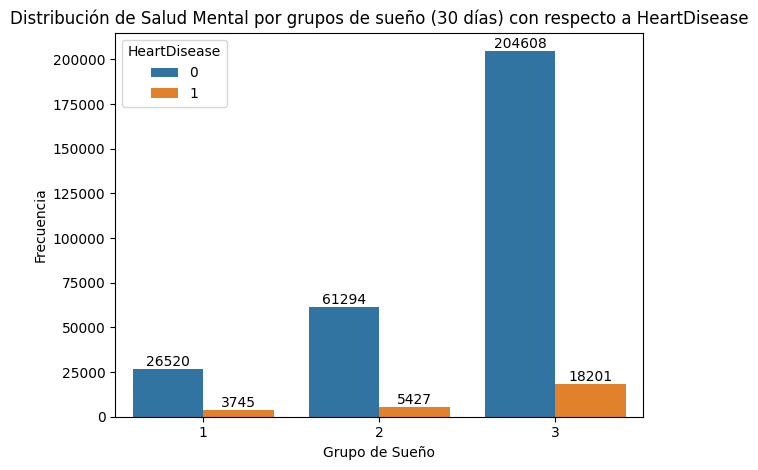

In [43]:
# Obtener los grupos de sueño ordenados por la frecuencia de HeartDisease igual a 1
order = df[df['HeartDisease'] == 1]['GrupoSalud_Mental_Ordinal'].value_counts().sort_values(ascending=False).index

# Gráfico de barras agrupadas
ax = sns.countplot(data=df, x='SleepGroup_Ordinal', hue='HeartDisease', linewidth=0.5, order=order)

plt.title('Distribución de Salud Mental por grupos de sueño (30 días) con respecto a HeartDisease')
plt.xlabel('Grupo de Sueño')
plt.ylabel('Frecuencia')

# Mostrar la cantidad en cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()



Antes de mostrar el siguiente gráfico recuerda que transformamos la columna de "SleepGroup_Ordinal" de la siguiente manera:
<details>
<summary>Descripción detallada del gráfico de "SleepGroup_Ordinal" VS "HeartDisease"</summary>
<p>


En el gráfico comparativo, se representa la distribución de la variable objetivo "HeartDisease" en relación con la variable "GrupoSalud_Mental_Ordinal", que categoriza los grupos de salud mental de mayor a menor relevancia. La variable objetivo indica si una persona ha padecido alguna vez una enfermedad cardíaca, tomando el valor 0 para "no" y el valor 1 para "sí".

En el gráfico, se observa que el grupo 3, que representa a las personas que tienen una salud mental de mayor relevancia, es decir, las que duermen de forma excesiva, se destaca con una mayor proporción de casos positivos de enfermedad cardíaca (valor 1 en "HeartDisease"). Esto indica que las personas que duermen de forma excesiva tienen una mayor probabilidad de haber padecido una enfermedad cardíaca en comparación con otros grupos de salud mental.

En segundo lugar, se encuentra el grupo 2, que corresponde a las personas con una salud mental óptima, es decir, aquellas que duermen las horas adecuadas. Este grupo también muestra una proporción significativa de casos positivos de enfermedad cardíaca, aunque menor que el grupo 3.

En último lugar, se encuentra el grupo 1, que representa a las personas con una salud mental de menor relevancia, es decir, aquellas que duermen de forma insuficiente. Este grupo muestra la menor proporción de casos positivos de enfermedad cardíaca.

En resumen, el gráfico revela una tendencia donde las personas que duermen de forma excesiva (grupo 3) tienen la mayor propensión a padecer enfermedades cardíacas, seguidas por aquellas que duermen de forma óptima (grupo 2), mientras que las personas que duermen de forma insuficiente (grupo 1) muestran la menor proporción de casos positivos de enfermedad cardíaca.


</p>
</details>

### CORRELACIONES DE LAS VARIABLES (HEATMAP)

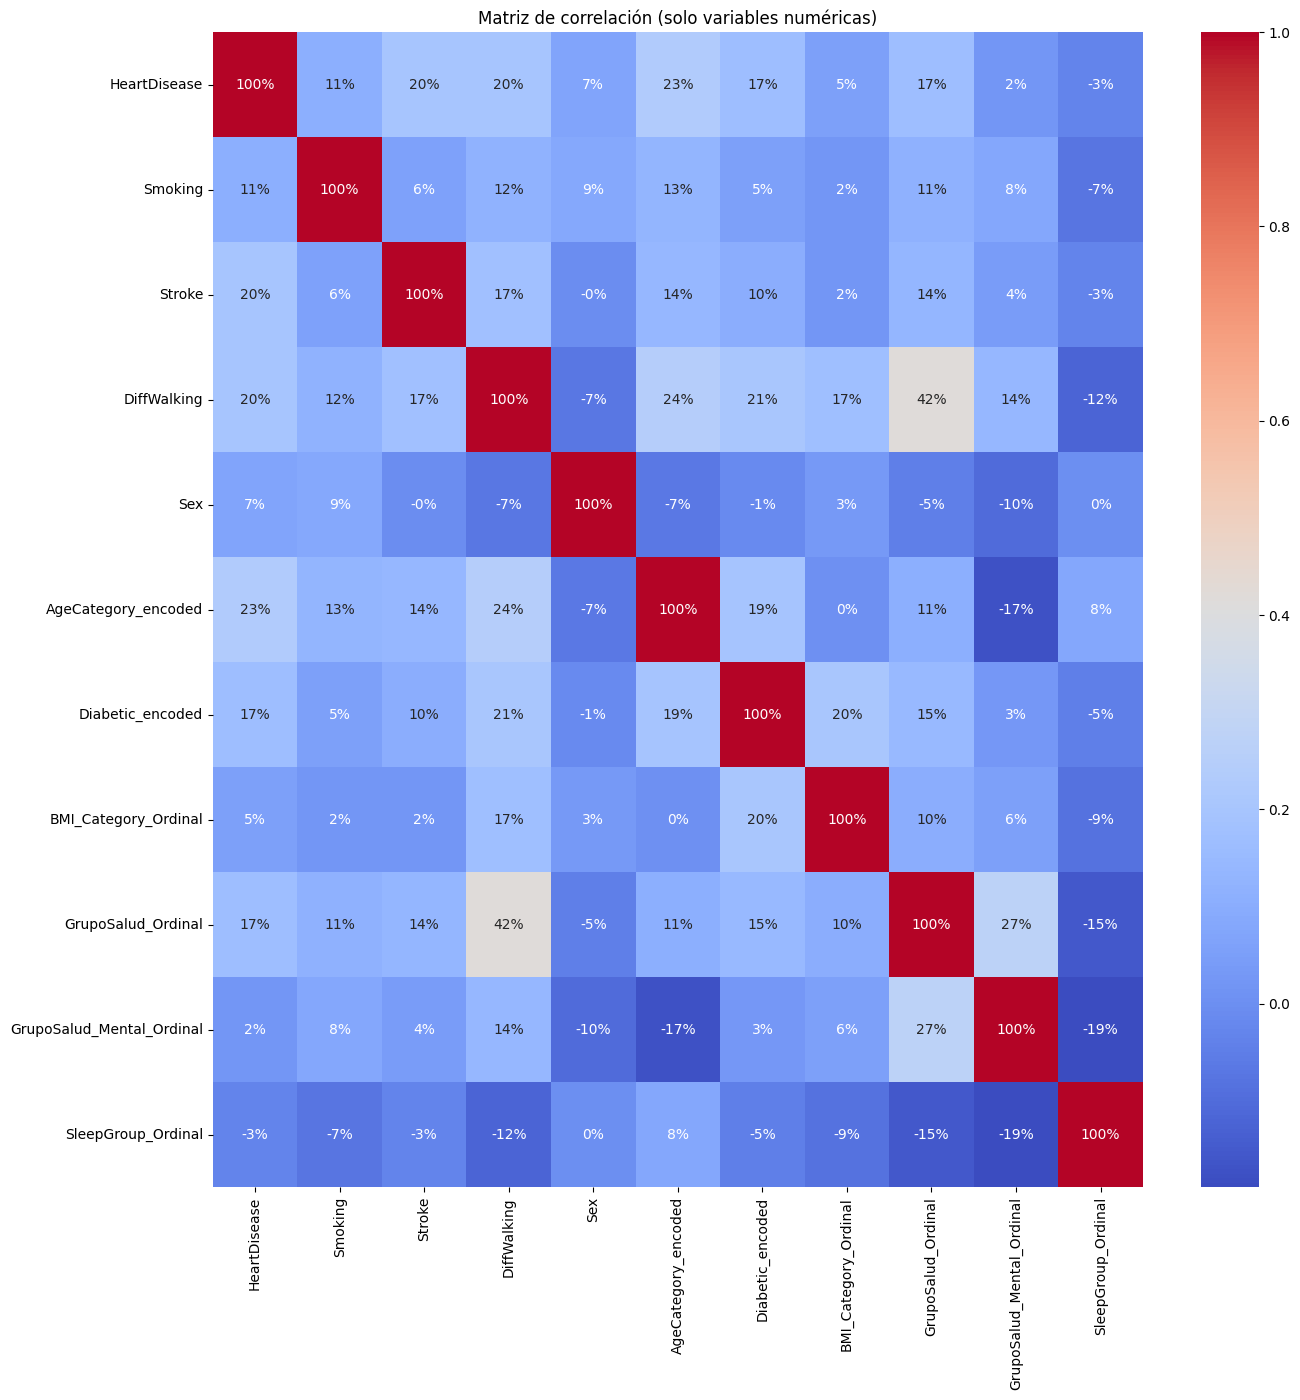

In [44]:
# Seleccionamos las columnas numéricas unicamente dejando fuera las de tipo object
numeric_columns = df.select_dtypes(include=['int32', 'float64', 'int64']).columns

# Calculamos la matriz de correlación para las columnas numéricas
correlation_matrix = df[numeric_columns].corr()

# Creamos mapa de calor de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%" )
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()

In [45]:
# Para observar mejor la correlación que se produce con respecto a la varible target de "HeartDisease"
# Se muestra en porcentage % y por orden ascendente
corr_matrix = df.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False) *100

HeartDisease                 100.000000
AgeCategory_encoded           23.343224
DiffWalking                   20.125805
Stroke                        19.683530
Diabetic_encoded              16.855285
GrupoSalud_Ordinal            16.731876
Smoking                       10.776416
Sex                            7.004048
BMI_Category_Ordinal           5.342468
GrupoSalud_Mental_Ordinal      2.130066
SleepGroup_Ordinal            -3.456049
Name: HeartDisease, dtype: float64

<details>
<summary>Descripción detallada de las correlaciones </summary>
<p>

A través del análisis del mapa de calor y la correlación entre las variables y nuestro objetivo "HeartDisease", podemos identificar las siguientes relaciones destacadas:

**AgeCategory_encoded**: Esta variable muestra una correlación positiva del 23% con "HeartDisease". Indica que a medida que aumenta la categoría de edad, es más probable que alguien haya padecido una enfermedad cardíaca.

**DiffWalking**: Esta variable tiene una correlación cercana al 20% con "HeartDisease". Indica que las personas que experimentan dificultades serias para caminar o subir escaleras tienen una mayor probabilidad de haber tenido una enfermedad cardíaca.

**Stroke**: La variable "Stroke" también muestra una correlación cercana al 20% con "HeartDisease". Indica que las personas que han tenido un accidente cerebrovascular tienen una mayor probabilidad de haber padecido una enfermedad cardíaca.

**Diabetic_encoded**: Esta variable tiene una correlación de aproximadamente el 17% con "HeartDisease". Indica que las personas que han sido diagnosticadas con diabetes tienen una mayor probabilidad de haber tenido una enfermedad cardíaca.

**GrupoSalud_Ordinal**: La variable "GrupoSalud_Ordinal" también muestra una correlación cercana al 17% con "HeartDisease". Indica que los grupos de salud mental clasificados como "Buena salud" tienen una mayor probabilidad de haber padecido una enfermedad cardíaca.

**Smoking**: Esta variable tiene una correlación cercana al 11% con "HeartDisease". Indica que los fumadores tienen una mayor probabilidad de haber tenido una enfermedad cardíaca.

Otras variables tienen una correlación menos significativa con "HeartDisease" y su impacto en la probabilidad de haber padecido una enfermedad cardíaca es menor. Es importante tener en cuenta que la correlación no implica causalidad, pero nos brinda una idea de las posibles relaciones entre las variables y nuestro objetivo.



</p>
</details>

In [46]:
# Usamos skew para calcular la asimetría de nuestro DataFrame
    # Un valor positivo indica una cola más larga hacia la derecha, lo que significa que hay valores extremos más altos. 
    # Un valor negativo indica una cola más larga hacia la izquierda, lo que significa que hay valores extremos más bajos.
df.skew(axis=0).sort_values(ascending =False)

Stroke                       4.851460
HeartDisease                 2.962525
GrupoSalud_Ordinal           2.199359
Diabetic_encoded             2.088800
DiffWalking                  2.088606
GrupoSalud_Mental_Ordinal    1.808620
BMI_Category_Ordinal         0.659454
Smoking                      0.355585
Sex                          0.099029
AgeCategory_encoded         -0.263611
SleepGroup_Ordinal          -1.391516
dtype: float64

<details>
<summary>Descripción detallada de la asimetría </summary>
<p>
Al observar los valores de sesgo ordenados de forma descendente, podemos notar que las variables "Stroke" y "HeartDisease" presentan los sesgos más altos. Esto indica que estas variables tienen distribuciones asimétricas con colas más largas en el lado derecho. En otras palabras, tienen valores extremadamente altos que se alejan de la media.

Por otro lado, las variables "Sex" y "AgeCategory_encoded" muestran sesgos cercanos a cero, lo que sugiere que sus distribuciones son más simétricas y equilibradas alrededor de la media. Esto significa que no hay una presencia significativa de valores extremadamente altos o bajos en estas variables.



</p>
</details>